In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
from plotly.offline import init_notebook_mode
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy

# nltk.download('omw-1.4')
# tqdm.pandas()
# spacy_eng = spacy.load("en_core_web_sm")
# nltk.download('stopwords')
# lemm = WordNetLemmatizer()
# init_notebook_mode(connected=True)
# sns.set_style("darkgrid")
# plt.rcParams['figure.figsize'] = (20,8)
# plt.rcParams['font.size'] = 18

In [ ]:
from tqdm.auto import tqdm
tqdm.pandas()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/Rotman MMA/RSM 8521/Final Project'

In [ ]:
data = pd.read_csv(path + '/train.csv')
data

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


# Data Cleaning and EDA
- Cleaning and preprocessing text data
- Finding insights about sentence lengths and words present in them

## Remove Null Values

In [ ]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
data.dropna(inplace=True)

## Text Cleaning
- Since the context of sentences are important for this NLP problem removal of stopwords might affect both the grammatical as well as semantic meaning of the sentences
- For similar reasons the words are not lemmatized or stemmed so that the semantic meaning of the sentence remains intact
- Therefore very basic cleaning is performed on the text data like removal of extra spaces and special characters

In [ ]:
def text_cleaning(x):

    questions = re.sub('\s+\n+', ' ', x)
    questions = re.sub('[^a-zA-Z0-9]', ' ', questions)
    questions = questions.lower()

    return questions

In [ ]:
data['question1_cleaned'] = data['question1'].progress_apply(text_cleaning)
data['question2_cleaned'] = data['question2'].progress_apply(text_cleaning)
data

  0%|          | 0/404287 [00:00<?, ?it/s]

  0%|          | 0/404287 [00:00<?, ?it/s]

,id,qid1,qid2,question1,question2,is_duplicate,question1_cleaned,question2_cleaned
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt...,which fish would survive in salt water
...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,do you believe there is life after death,is it true that there is life after death
404287,404287,537928,537929,What is one coin?,What's this coin?,0,what is one coin,what s this coin
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,what is the approx annual cost of living while...,i am having little hairfall problem but i want...


## Sentence Length Distributions
- Here the objective is to find the ideal length of the sentence that should be used in our model
- In many cases the maximum sentence length is taken for embedding representations but by looking at the sentence length distributions a more informed decision can be made which will help in reducing the parameters of our model
- For transformers based models masks usually mask out the sentences which are short but are padded to a longer length, but since we are focused on finding the ideal length statistically we will go ahead with that

In [ ]:
data['question1_lens'] = data['question1_cleaned'].apply(lambda x: len(x.split()))
data['question2_lens'] = data['question2_cleaned'].apply(lambda x: len(x.split()))

## Word Cloud Visualization
- Word clouds help in visually identifying the most frequent words present in the sentences which also give a brief idea what the context of the sentences are
- Two wordclouds are visualized below for both pairs of sentences

In [ ]:
question1 = data['question1_cleaned'].tolist()
question2 = data['question2_cleaned'].tolist()

## Ideal Sentence Length
- By looking at both the distrbution plots and descriptive statistics it is pretty clear that taking the maximum sentence length won't make much sense of our model
- The descriptive stats also represent the likeliness of an extremely long sentence really occuring on a platform like Quora
- Since the descriptive stats of both the pairs of questions look very similar lets analyse any one of them to find the upper outlier
- Once this upper outlier is found we can choose a number nearby to it to be our ideal sentence length for our embedding representation

In [ ]:
data['question1_lens'].describe()

count    404287.000000
mean         11.127968
std           5.571416
min           0.000000
25%           7.000000
50%          10.000000
75%          13.000000
max         128.000000
Name: question1_lens, dtype: float64

In [ ]:
data['question2_lens'].describe()

count    404287.000000
mean         11.376792
std           6.480827
min           0.000000
25%           7.000000
50%          10.000000
75%          13.000000
max         248.000000
Name: question2_lens, dtype: float64

In [ ]:
q1 = data['question1_lens'].quantile(0.25)
q3 = data['question1_lens'].quantile(0.75)

upper_outlier = q3 + 1.5*(q3-q1)
print(upper_outlier)

22.0


# Modelling


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer,DataCollatorWithPadding,TFAutoModel,DistilBertConfig,TFDistilBertModel, BertConfig, TFBertModel, TFRobertaModel
#！pip install datasets
#from datasets import load_dataset

## Siamese BERT


In [ ]:
model_checkpoint = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

## BERT Text Tokenizer
- Generates
    - Padded Encodings
    - Attention Masks

In [ ]:
def encode_text(text, tokenizer):

    encoded = tokenizer.batch_encode_plus(
        text,
        add_special_tokens=True,
        max_length=50,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors="tf",
    )

    input_ids = np.array(encoded["input_ids"], dtype="int32")
    attention_masks = np.array(encoded["attention_mask"], dtype="int32")

    return {
        "input_ids": input_ids,
        "attention_masks": attention_masks
    }

## Data Splitting
- 400000 data is sampled for our task
- 80:20 split is performed on the data
    - 80% for Training
    - 20% for Validation

In [ ]:
# data = data.sample(400000)
# train = data.iloc[:int(400000*0.80),:]
# val = data.iloc[int(400000*0.80):,:]

# data = data.sample(4000)
# train = data.iloc[:int(4000*0.80),:]
# val = data.iloc[int(4000*0.80):,:]

data = data.sample(20000)
train = data.iloc[:int(20000*0.80),:]
val = data.iloc[int(20000*0.80):,:]

# from imblearn.over_sampling import SMOTE

# # Assuming 'data' is your DataFrame and it has been sampled as needed
# data = data.sample(4000)
# train = data.iloc[:int(4000 * 0.80), :]
# val = data.iloc[int(4000 * 0.80):, :]

# # Separate features and target variable in training data
# X_train = train.drop('is_duplicate', axis=1)
# y_train = train['is_duplicate']

# # Apply SMOTE only to the training data
# smote = SMOTE()
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Now encode your text data
# # Assuming 'encode_text' is a function you've defined to encode your text data
# X1_train_encoded = encode_text(X_train_resampled['question1_cleaned'].tolist(), tokenizer)
# X2_train_encoded = encode_text(X_train_resampled['question2_cleaned'].tolist(), tokenizer)

# # For the validation set, just encode the text without SMOTE
# X1_val_encoded = encode_text(val['question1_cleaned'].tolist(), tokenizer)
# X2_val_encoded = encode_text(val['question2_cleaned'].tolist(), tokenizer)

# y_val = val['is_duplicate'].values

# # Now, you should use X1_train_encoded, X2_train_encoded, and y_train_resampled for training your model
# # And use X1_val_encoded, X2_val_encoded, and y_val for validation



X1_train = encode_text(train['question1_cleaned'].tolist(), tokenizer)
X2_train = encode_text(train['question2_cleaned'].tolist(), tokenizer)
X1_val = encode_text(val['question1_cleaned'].tolist(), tokenizer)
X2_val = encode_text(val['question2_cleaned'].tolist(), tokenizer)

y_train = train['is_duplicate'].values
y_val = val['is_duplicate'].values


## TPU Configuration

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    BATCH_SIZE = strategy.num_replicas_in_sync * 4
    print("Running on TPU:", tpu.master())
    print(f"Batch Size: {BATCH_SIZE}")

except ValueError:
    strategy = tf.distribute.get_strategy()
    BATCH_SIZE = 32
    print(f"Running on {strategy.num_replicas_in_sync} replicas")
    print(f"Batch Size: {BATCH_SIZE}")

Running on 1 replicas
Batch Size: 32


# Original Siamese Network with L1 Distance Layer


In [ ]:
class L1Dist(Layer):

    def __init__(self,**kwargs):
        super().__init__()

    def call(self,embedding1,embedding2):
        return tf.math.abs(embedding1 - embedding2)

In [ ]:
with strategy.scope():
    transformer_model = TFBertModel.from_pretrained(model_checkpoint)

    input_ids_in1 = Input(shape=(None,),name='input_ids1', dtype='int32')
    input_masks_in1 = Input(shape=(None,), name='attention_mask1', dtype='int32')
    input_ids_in2 = Input(shape=(None,),name='input_ids2', dtype='int32')
    input_masks_in2 = Input(shape=(None,), name='attention_mask2', dtype='int32')

    embedding_layer1 = transformer_model(input_ids_in1, attention_mask=input_masks_in1).last_hidden_state
    embedding_layer2 = transformer_model(input_ids_in2, attention_mask=input_masks_in2).last_hidden_state

    embedding1 = GlobalAveragePooling1D()(embedding_layer1)
    embedding2 = GlobalAveragePooling1D()(embedding_layer2)
    l1_dist = L1Dist()(embedding1,embedding2)

    x = Dense(512, activation='relu')(l1_dist)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[input_ids_in1, input_masks_in1, input_ids_in2, input_masks_in2], outputs = output)
    model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),metrics='accuracy')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# import tensorflow as tf
# import transformers
# print("TensorFlow version:", tf.__version__)
# print("Transformers version:", transformers.__version__)

In [ ]:
# !pip install tensorflow==2.9.1
# !pip install transformers==4.40.0

In [ ]:
for layer in model.layers[:5]:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids1 (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 attention_mask1 (InputLayer)   [(None, None)]       0           []                               
                                                                                                  
 input_ids2 (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 attention_mask2 (InputLayer)   [(None, None)]       0           []                               
                                                                                              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=3,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.001)

In [ ]:
history = model.fit((np.asarray(X1_train['input_ids']),np.asarray(X1_train['attention_masks']),np.asarray(X2_train['input_ids']),np.asarray(X2_train['attention_masks'])),
                    y_train, batch_size=BATCH_SIZE, epochs=5,
                    validation_data=((np.asarray(X1_val['input_ids']),np.asarray(X1_val['attention_masks']),np.asarray(X2_val['input_ids']),np.asarray(X2_val['attention_masks'])), y_val),
                    callbacks=[earlystopping, learning_rate_reduction])

Epoch 1/5


500/500 [==============================] - 3811s 8s/step - loss: 0.5961 - accuracy: 0.6283 - val_loss: 0.5500 - val_accuracy: 0.6363 - lr: 1.0000e-05
Epoch 2/5
500/500 [==============================] - 3698s 7s/step - loss: 0.5217 - accuracy: 0.6713 - val_loss: 0.5106 - val_accuracy: 0.7165 - lr: 1.0000e-05
Epoch 3/5
500/500 [==============================] - 3782s 8s/step - loss: 0.4478 - accuracy: 0.7502 - val_loss: 0.4917 - val_accuracy: 0.7567 - lr: 1.0000e-05
Epoch 4/5
500/500 [==============================] - 3727s 7s/step - loss: 0.3625 - accuracy: 0.8302 - val_loss: 0.4999 - val_accuracy: 0.7617 - lr: 1.0000e-05
Epoch 5/5
500/500 [==============================] - 3728s 7s/step - loss: 0.2810 - accuracy: 0.8809 - val_loss: 0.5138 - val_accuracy: 0.7613 - lr: 1.0000e-05


## Model Inference
- Learning Curves
- ROC-AUC Curves
- Confusion Matrix
- Classification Report

## Learning Curve
- Since it is a pretrained model we do not train it for longer epochs, also due to the fact that the validation loss increases after first 3 epochs the training is restricted to 5 epochs
- The best weights from the most converged state are taken forward

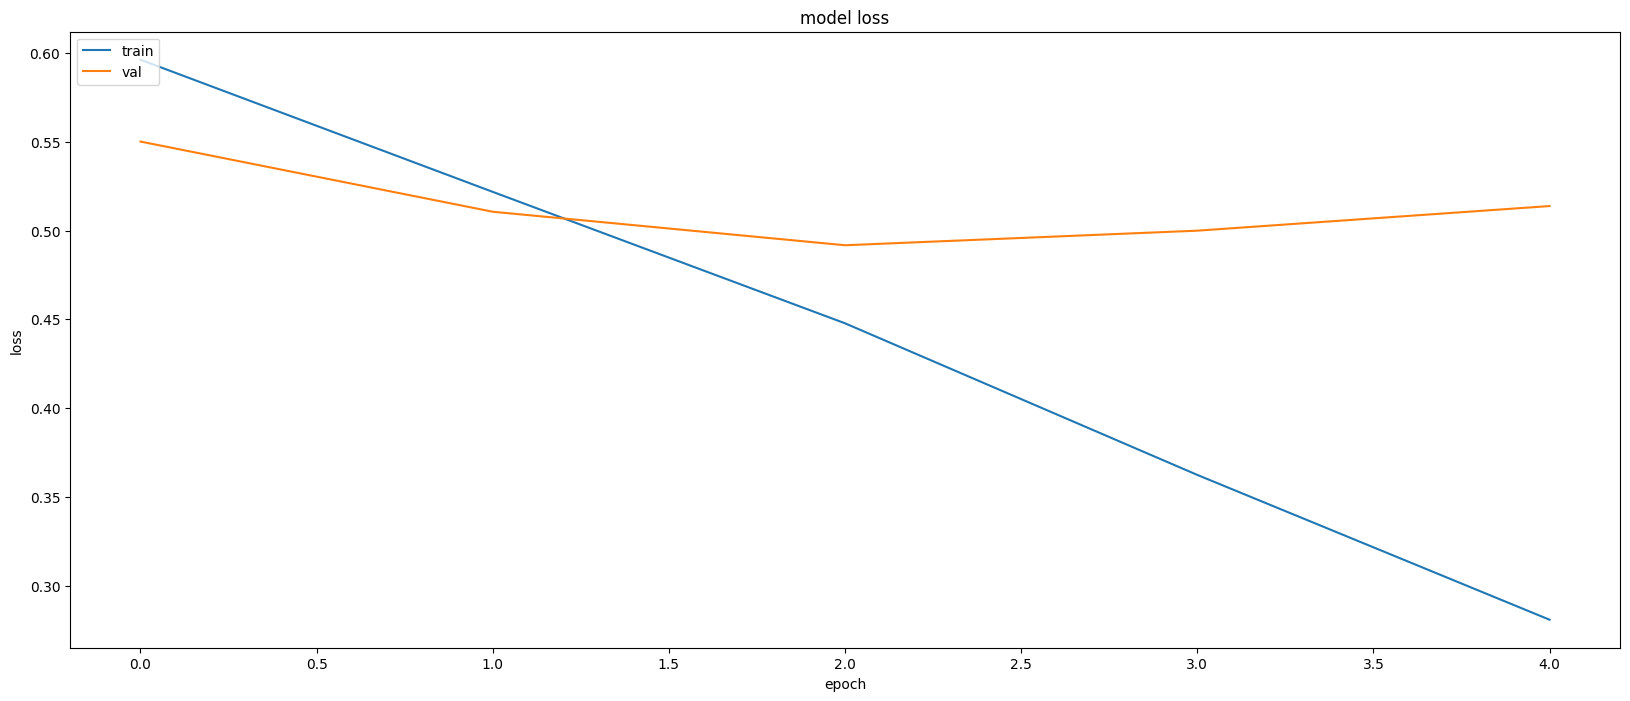

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

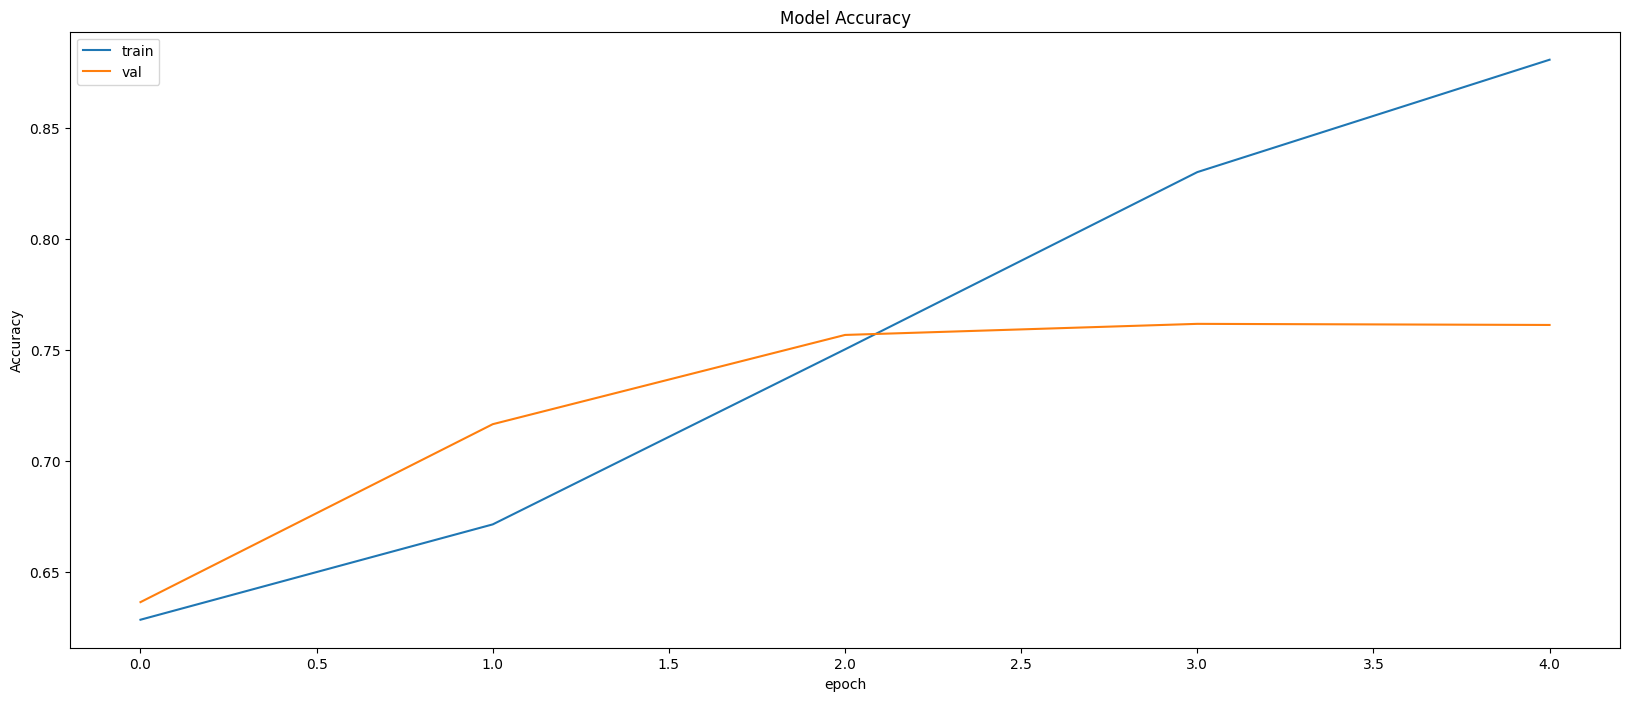

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict((np.asarray(X1_val['input_ids']),np.asarray(X1_val['attention_masks']),np.asarray(X2_val['input_ids']),np.asarray(X2_val['attention_masks'])))

125/125 [==============================] - 265s 2s/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

## ROC-AUC Curve
- The AUC score of 95% gives a clear indication about the good separability performance of our model
- The threshold values can be experimented with to acheive the desirable number of True positives or avoiding False positives

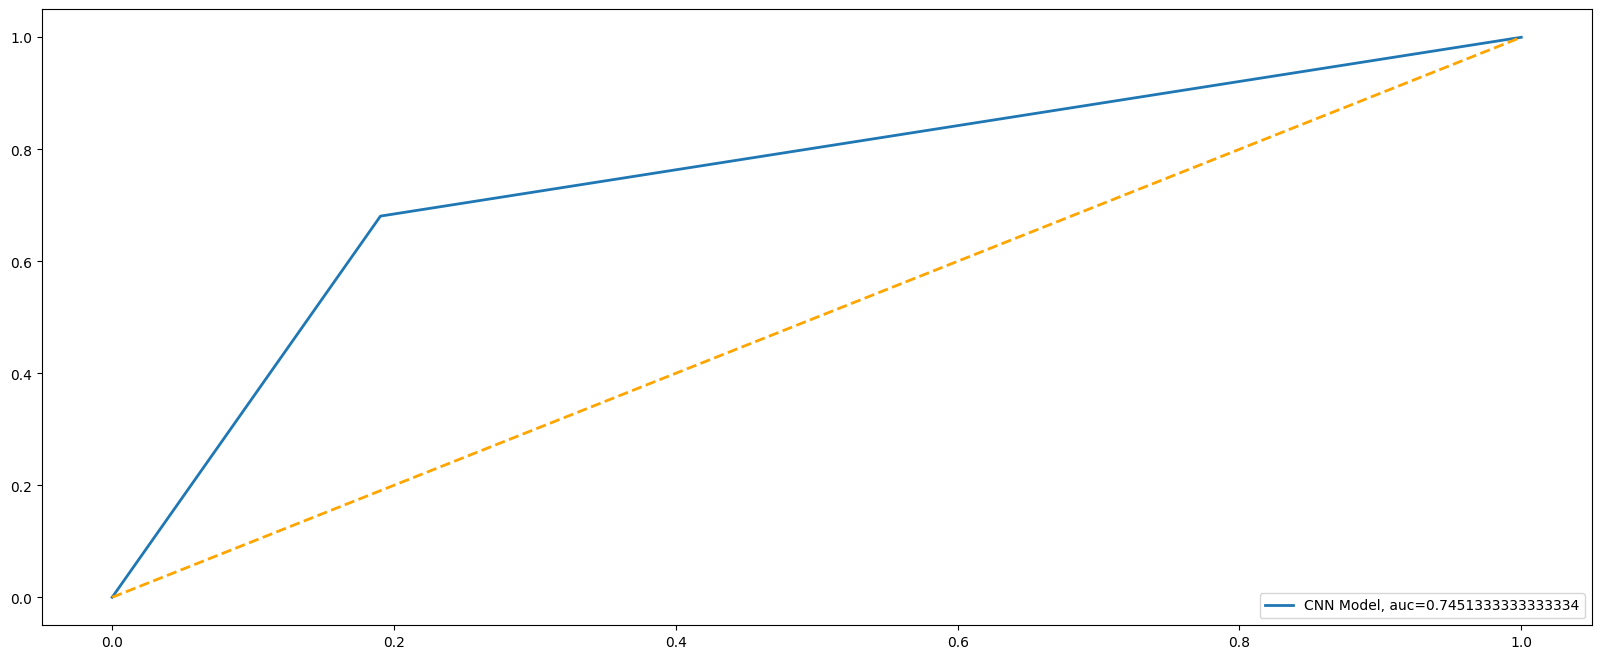

In [ ]:
plt.figure(figsize=(20,8))
fpr, tpr, _ = roc_curve(y_val,  y_pred)
auc = roc_auc_score(y_val, y_pred)
plt.plot(fpr,tpr,label="CNN Model, auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

## Confusion Matrix

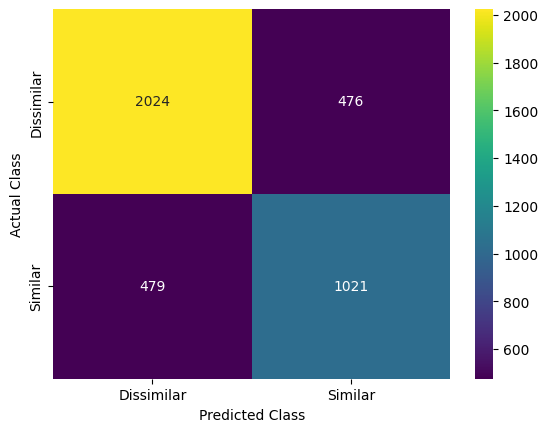

In [ ]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

sns.heatmap(confusion_matrix(y_val, y_pred),cmap='viridis',annot=True,fmt='.5g',
            xticklabels=['Dissimilar','Similar'],yticklabels=['Dissimilar','Similar'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Classification Report
- Our model achieves an F1-score of 89%
- F1-score is considered as there is a slight imbalance in the data
- Model performs slightlty less accurate for similar classes

In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2500
           1       0.68      0.68      0.68      1500

    accuracy                           0.76      4000
   macro avg       0.75      0.75      0.75      4000
weighted avg       0.76      0.76      0.76      4000

